<a href="https://colab.research.google.com/github/aaroha33/My-Assignments/blob/main/Tredence_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center> Tredence Analytics Assignment </center></h1>



* Your client ABC (manuf_data) came with an ask that they don’t have visibility of the sales on retailer platforms(retailer_data). Reason there is no unique key mapping       product of ABC to its product being sold on retailer (retailer example-Amazon). In the absence of a common primary key, you are left with descriptions to do the mapping. You need to use the description of ABC (manuf_data) and description of its product on retailer platform(retailer_data) to do the mapping
* Map all the retailer product to top 3-4 best possible match on ABC side. Use any NLP technique to the achieve the objective
* Things to keep in mind- we have not provided any training data- please create one if needed, clearly comment your code.





<font color="blue" size=+2.5><b> Import ibrary </b></font>

In [97]:
import io
import os

import pandas as pd
import seaborn as sns
from PIL import Image
import numpy as np
import itertools
import collections
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import display, HTML
import plotly.graph_objects as go
from nltk.tokenize import ToktokTokenizer

from nltk.tokenize import TweetTokenizer 
import nltk
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


<font color="blue" size=+2.5><b> Upload Data Sets </b></font>

In [48]:
from google.colab import files
uploaded = files.upload()


Saving retailer_data.xlsx to retailer_data (2).xlsx
Saving manuf_data.xlsx to manuf_data (2).xlsx


In [49]:
retail = pd.read_excel(io.BytesIO(uploaded['retailer_data.xlsx']))
mnf = pd.read_excel(io.BytesIO(uploaded['manuf_data.xlsx']))

<font color="blue" size=+2.5><b> EDA </b></font>

In [50]:
retail.head()

,ret_prod_id,Product_Description
0,188,Oddaced Give Me Moisture Shampoo 250ml
1,334,Cbvery Freeze Hold Hairspray 400ml
2,328,Cbvery Firm Hold Hairspray 400ml
3,203,Oddaced Ultimate Hold Hairspray 400ml
4,324,Cbvery Extra Hold Hairspray 400ml


In [51]:
mnf.head()

,prod_id,Description
0,355,Mexifiz Shampoo Intensive Repair 400ml
1,356,Mexifiz Shampoo Intensive Repair 400ml
2,381,Cbv Shampoo Moisture Rich 900ml
3,382,Cbv Shampoo Moisture Rich 900ml
4,426,Cbvery Hairspray Extra Hold 400ml


In [52]:
mnf.isnull().sum()
retail.isnull().sum()

ret_prod_id            0
Product_Description    0
dtype: int64

<font color="blue" size=+2.5><b> WORDCLOUD </b></font>

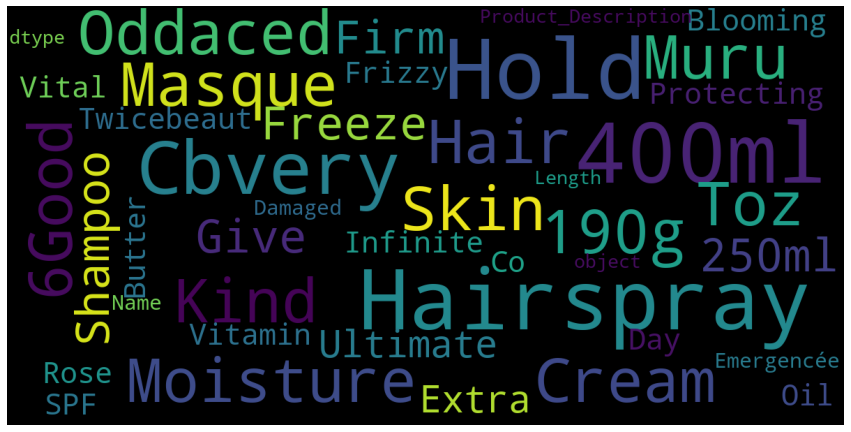

In [53]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(retail['Product_Description'])

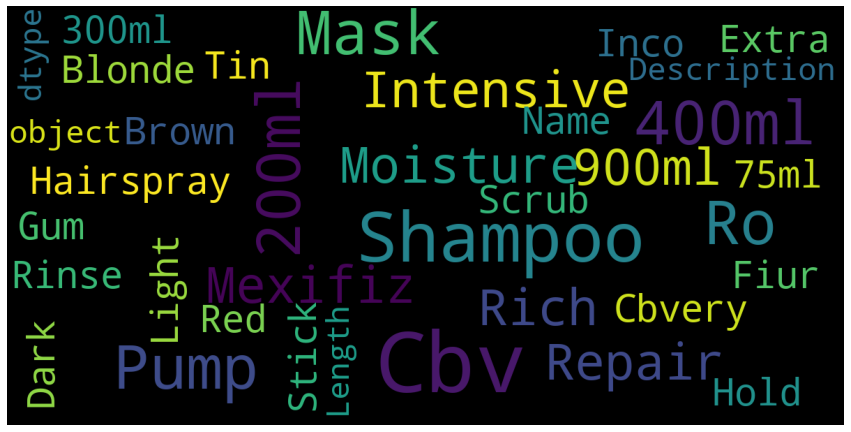

In [54]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(mnf['Description'])

In [55]:
retail['Description_length'] = retail['Product_Description'].apply(len)
#retail['Product_Description_length1'] = [len(t) for t in retail.Product_Description]

In [57]:
retail.head()

,ret_prod_id,Product_Description,Description_length
0,188,Oddaced Give Me Moisture Shampoo 250ml,38
1,334,Cbvery Freeze Hold Hairspray 400ml,34
2,328,Cbvery Firm Hold Hairspray 400ml,32
3,203,Oddaced Ultimate Hold Hairspray 400ml,37
4,324,Cbvery Extra Hold Hairspray 400ml,33


### Overall Distribution of the length 

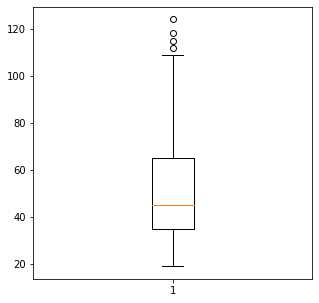

In [58]:
fig,ax = plt.subplots(figsize=(5,5))
plt.boxplot(retail.Description_length)
plt.show()

In [59]:
mnf['Description_length'] = mnf['Description'].apply(len)
mnf.head()

,prod_id,Description,Description_length
0,355,Mexifiz Shampoo Intensive Repair 400ml,38
1,356,Mexifiz Shampoo Intensive Repair 400ml,38
2,381,Cbv Shampoo Moisture Rich 900ml,31
3,382,Cbv Shampoo Moisture Rich 900ml,31
4,426,Cbvery Hairspray Extra Hold 400ml,33


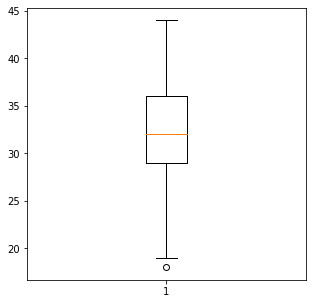

In [60]:
fig,ax = plt.subplots(figsize=(5,5))
plt.boxplot(mnf.Description_length)
plt.show()

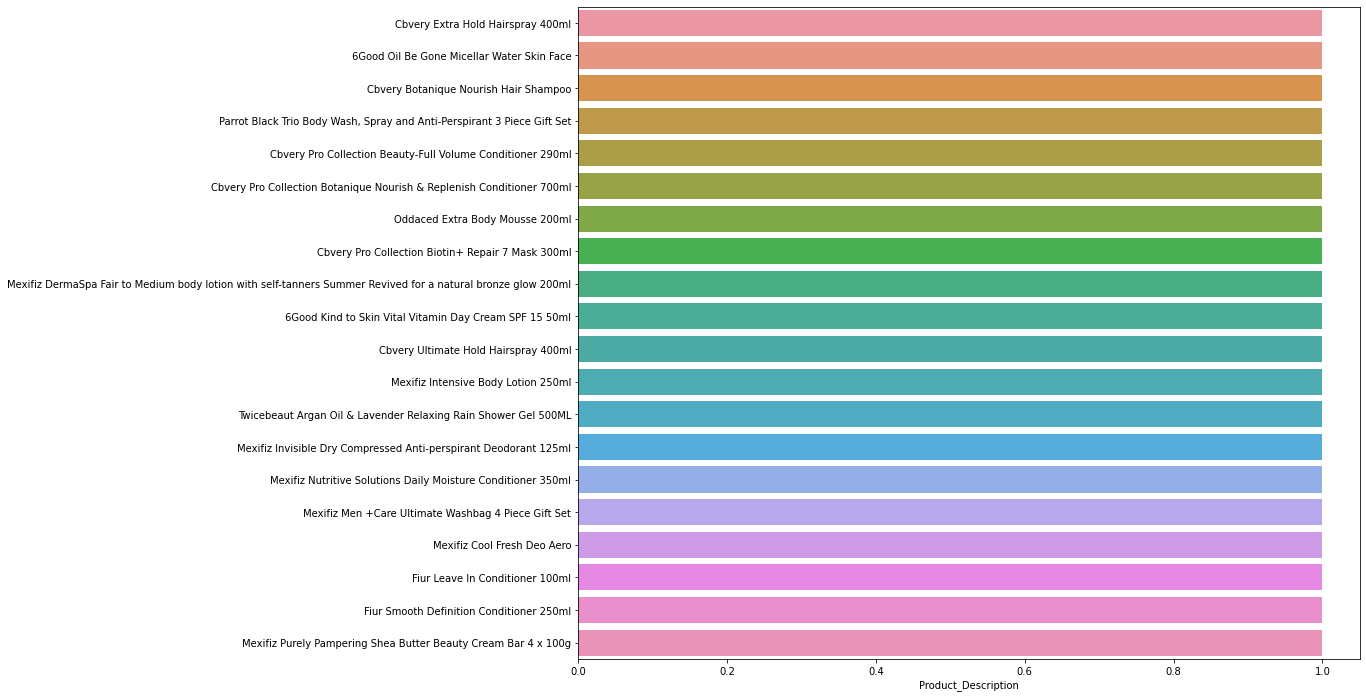

In [61]:
# Plotting the first 20 most common keywords in retail
figure = plt.figure(figsize=(14,12))
sns.barplot(y=retail['Product_Description'].value_counts().index[:20], x=retail['Product_Description'].value_counts()[:20])

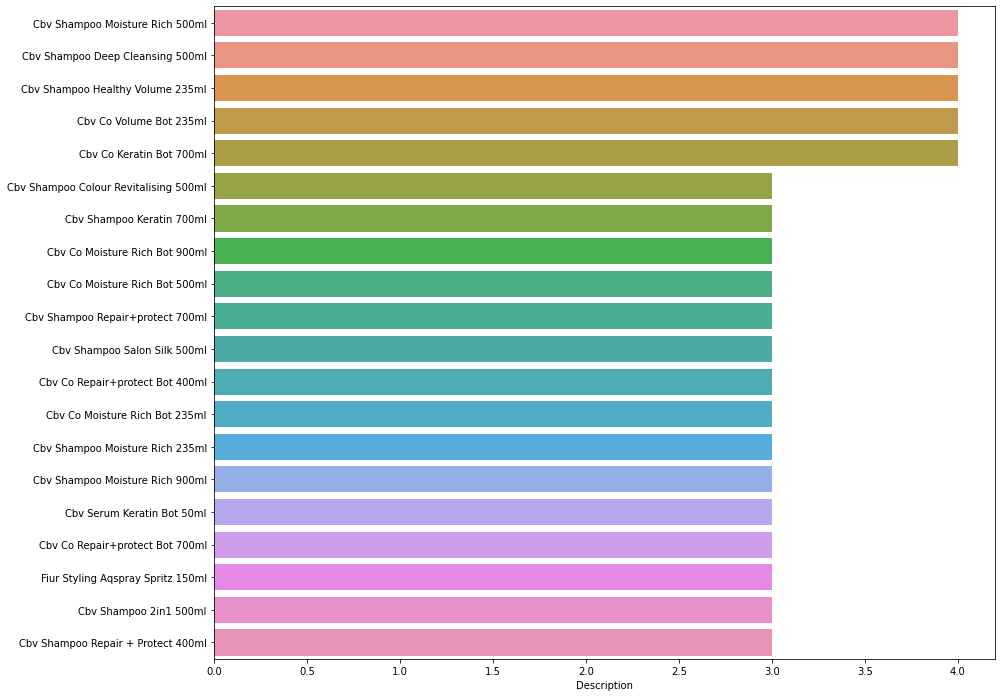

In [62]:
# Plotting the first 20 most common keywords in manufacturing(abc)
figure = plt.figure(figsize=(14,12))
sns.barplot(y=mnf['Description'].value_counts().index[:20], x=mnf['Description'].value_counts()[:20])

**What about frequency of the words?**

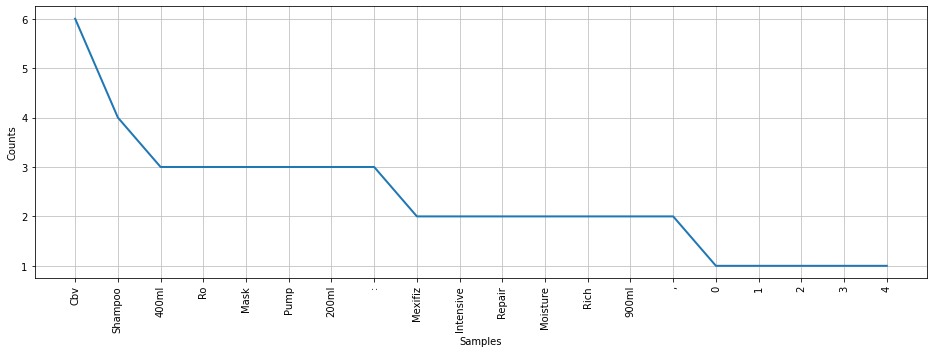

In [63]:
x=nltk.FreqDist(ToktokTokenizer().tokenize(mnf['Description']))
plt.figure(figsize=(16,5))
x.plot(20)

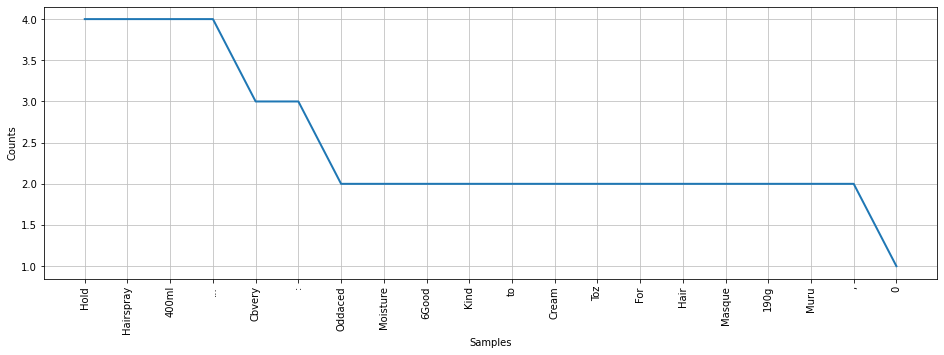

In [64]:
x=nltk.FreqDist(ToktokTokenizer().tokenize(retail['Product_Description']))
plt.figure(figsize=(16,5))
x.plot(20)

### Term Frequencies 

In [65]:
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))
cvector.fit(mnf.Description)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [66]:
len(cvector.get_feature_names())

866

It looks like count vectorizer has extracted 866 words out of the corpus.

In [82]:
Desc = mnf['Description']

## Text Clean Up

In [84]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

It turns out that using TF-IDF gives even better priors than the binarized features used in the paper. I don't think this has been mentioned in any paper before, but it improves a lot !!!
Although in our data if we do not use this that will be OKay !! but it is a good practice.

In [87]:
n = mnf.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
term_doc = vec.fit_transform(mnf['Description'])


In [88]:
term_doc

<386x306 sparse matrix of type '<class 'numpy.float64'>'
	with 3138 stored elements in Compressed Sparse Row format>

In [90]:
Desc

0      Mexifiz Shampoo Intensive Repair 400ml
1      Mexifiz Shampoo Intensive Repair 400ml
2             Cbv Shampoo Moisture Rich 900ml
3             Cbv Shampoo Moisture Rich 900ml
4           Cbvery Hairspray Extra Hold 400ml
                        ...                  
381         Cbv Ro Mask Pump 200ml Dark Brown
382       Cbv Ro Mask Pump 200ml Light Blonde
383                Cbv Ro Mask Pump 200ml Red
384            Cbv Inco Rinse Off Scrub 300ml
385                   Fiur Gum Stick Tin 75ml
Name: Description, Length: 386, dtype: object

In [93]:
Desc[0].lower().split()

['mexifiz', 'shampoo', 'intensive', 'repair', '400ml']

In [100]:
words_in_Desc = [d.lower().split() for d in Desc]
words_in_Desc[:2]

[['mexifiz', 'shampoo', 'intensive', 'repair', '400ml'],
 ['mexifiz', 'shampoo', 'intensive', 'repair', '400ml']]

In [103]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_Desc))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('cbv', 193),
 ('shampoo', 127),
 ('bot', 123),
 ('co', 101),
 ('400ml', 67),
 ('oddaced', 62),
 ('250ml', 52),
 ('mexifiz', 51),
 ('200ml', 45),
 ('fiur', 37),
 ('colour', 33),
 ('moisture', 30),
 ('hold', 30),
 ('500ml', 30),
 ('100ml', 29)]

In [107]:
mnf_desc = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

mnf_desc.head()


,words,count
0,cbv,193
1,shampoo,127
2,bot,123
3,co,101
4,400ml,67


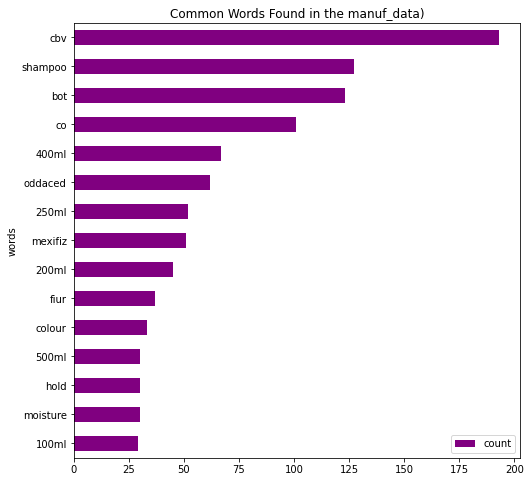

In [109]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
mnf_desc.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in the manuf_data)")

plt.show()

In [111]:
r_desc = retail['Product_Description']


In [112]:
r_desc

0                 Oddaced Give Me Moisture Shampoo 250ml
1                     Cbvery Freeze Hold Hairspray 400ml
2                       Cbvery Firm Hold Hairspray 400ml
3                  Oddaced Ultimate Hold Hairspray 400ml
4                      Cbvery Extra Hold Hairspray 400ml
                             ...                        
384    6Good Kind to Skin+ Protecting Moisture Cream ...
385    6Good Kind to Skin Vital Vitamin Day Cream SPF...
386         Toz Oil Infinite For Frizzy Hair Masque 190g
387    Twicebeaut Muru Muru Butter & Rose Blooming Co...
388          Toz Emergencée Masque For Damaged Hair 190g
Name: Product_Description, Length: 389, dtype: object

In [113]:
words_in_r_Desc = [d.lower().split() for d in r_desc]
words_in_r_Desc[:2]

[['oddaced', 'give', 'me', 'moisture', 'shampoo', '250ml'],
 ['cbvery', 'freeze', 'hold', 'hairspray', '400ml']]

In [114]:
# List of all words across tweets
r_desc_new = list(itertools.chain(*words_in_r_Desc))

# Create counter
r_desc_2 = collections.Counter(r_desc_new)

r_desc_2.most_common(15)

[('mexifiz', 104),
 ('hair', 78),
 ('for', 77),
 ('ml', 75),
 ('shampoo', 72),
 ('cbvery', 60),
 ('250ml', 55),
 ('6good', 50),
 ('parrot', 47),
 ('conditioner', 46),
 ('&', 45),
 ('fiur', 42),
 ('oddaced', 41),
 ('deodorant', 41),
 ('anti-perspirant', 38)]

In [117]:
retail_desc = pd.DataFrame(r_desc_2.most_common(15),
                             columns=['words', 'count'])

retail_desc.head()

,words,count
0,mexifiz,104
1,hair,78
2,for,77
3,ml,75
4,shampoo,72


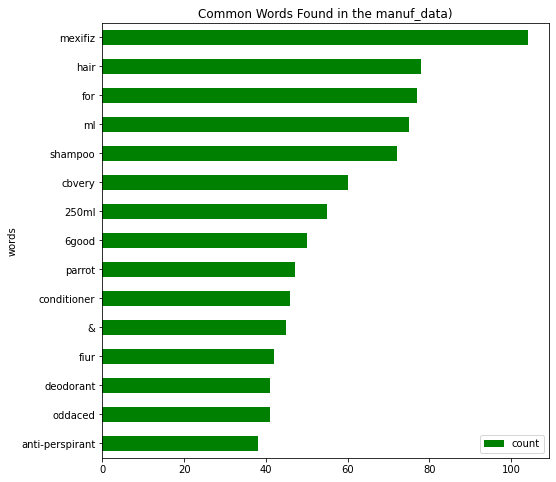

In [119]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
retail_desc.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in the manuf_data)")

plt.show()